## Observations and Insights 

In [213]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

#read data
mouse_metadata_df = pd.read_csv("data/Mouse_metadata.csv")
study_results_df = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
single_dataset = pd.merge(study_results_df,mouse_metadata_df, how ='left', on =["Mouse ID"])

# Display the data table for preview

# I displayed the first 9 rows for a more detailed preview:
single_dataset.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [214]:
# Check the number of mice.
num_mice = len(single_dataset['Mouse ID'].unique())
num_mice

In [215]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
#df = pd.DataFrame(single_dataset, columuns = ['Mouse ID','Timepoint'])

In [216]:
# Drop any duplicate rows
#df.drop_duplicates(keep = False)

In [217]:
# Recheck the number of mice
#num_mice = len(single_dataset['Mouse ID'].unique())
#num_mice

## Summary Statistics

In [218]:
# Generate a summary statistics table of mean, median, variance,standard deviation, and SEM of the tumor volume for each regimen.

#to get mean
dataset_mean = single_dataset.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#to get median
dataset_median = single_dataset.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#to get variance
dataset_variance = single_dataset.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#to get standard deviation
dataset_stdev = single_dataset.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#to get Standard Error of Mean
dataset_sem = single_dataset.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

#create dataframe for summary
new_df = pd.DataFrame(dataset_mean)
new_df.head()

#rename Tumor Volume column to mean 
new_tables = new_df.rename(columns={"Tumor Volume (mm3)": "Mean" })
#median,variance, sem, std for each drug for table
summary_table = new_tables.assign(Median=dataset_median, Variance = dataset_variance,Standard_Error_Mean = dataset_sem , Standard_Deviation = dataset_stdev)
#display  summary stat table
summary_table

,Mean,Median,Variance,Standard_Error_Mean,Standard_Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.322552,50.854632,42.351070,0.512884,6.507770
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


## Bar and Pie Charts

Text(0, 0.5, 'Data Points')

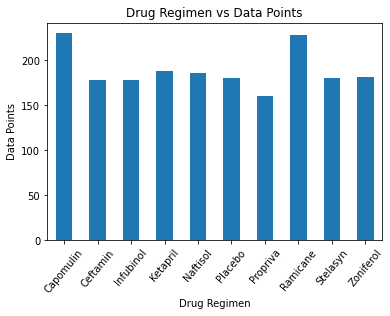

In [219]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
bar = single_dataset.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
barplot_info = bar.plot.bar(title = 'Drug Regimen vs Data Points', rot = 50)
barplot_info.set_ylabel("Data Points")

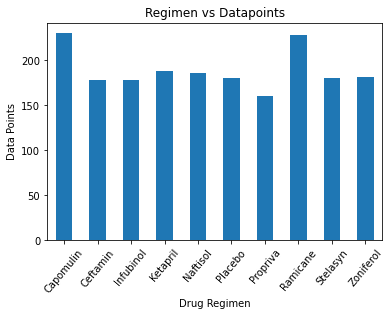

<Figure size 432x288 with 0 Axes>

In [220]:
# Generate identical bar plot using pyplot
barplot_dataset = single_dataset.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

#create df
barplot_dataset_df = pd.DataFrame(barplot_dataset)
#barplot_dataset_df
plt.xdata = barplot_dataset_df.plot.bar(legend = False, rot = 50, align="center")
plt.title('Regimen vs Datapoints')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')

#to show results 
plt.show()

#to show results with proper adjustments
plt.tight_layout()

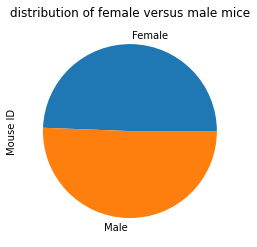

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = single_dataset.groupby('Sex').count()['Mouse ID']
pie = pie_data.plot.pie(y = 'Sex', title= 'distribution of female versus male mice')

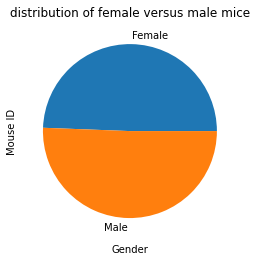

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

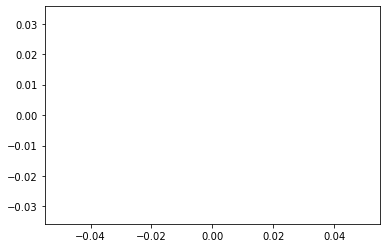

In [222]:
#   Generate identical pie plot using pyplot
pie_data = single_dataset.groupby('Sex').count()['Mouse ID']
pie_data_df = pd.DataFrame(pie_data)
#we create pie and make the labels
plt.pie(pie_data, labels=pie_data.index);
plt.title('distribution of female versus male mice')
plt.xlabel('Gender')
plt.ylabel('Mouse ID')
#to show results
plt.show()
#setting an equal axis ratio
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [223]:
#   Calculate the final tumor volume of each mouse across four of the treatment regimens:# Capomulin, Ramicane, and Ceftamin # HINT: Not all mice lived until timepoint 45

# Define Capomulin df
capomulin_df = single_dataset.loc[single_dataset["Drug Regimen"] == "Capomulin", :]
#  Define Ramicane df
ramicane_df = single_dataset.loc[single_dataset["Drug Regimen"] == "Ramicane", :]
#Define infubinol df
infubinol_df = single_dataset.loc[single_dataset["Drug Regimen"] == "Infubinol", :]
#Define Ceftamin df
ceftamin_df = single_dataset.loc[single_dataset["Drug Regimen"] == "Ceftamin", :]

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [224]:
#  Start by getting the last (greatest) timepoint for each mouse
#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#max timepoint
capomulin_maximum = capomulin_df.groupby('Mouse ID').max()['Timepoint']
#create dataframe
capomulin_maximum_dataframe = pd.DataFrame(capomulin_maximum)
capomulin_maximum_merge = pd.merge(capomulin_maximum_dataframe,single_dataset, on = ("Mouse ID", "Timepoint"), how= "left")

#max 
ramicane_maximum = ramicane_df.groupby('Mouse ID').max()['Timepoint']
#create dataframe
ramicane_maximum_dataframe = pd.DataFrame(ramicane_maximum)
ramicane_maximum_merge = pd.merge(ramicane_maximum_dataframe,single_dataset, on = ("Mouse ID", "Timepoint"), how= "left")

#max
infubinol_maximum = infubinol_df.groupby('Mouse ID').max()['Timepoint']
#create dataframe
infubinol_maximum_dataframe = pd.DataFrame(infubinol_maximum)
infubinol_maximum_merge = pd.merge(infubinol_maximum_dataframe,single_dataset, on = ("Mouse ID", "Timepoint"), how= "left")

#max 
ceftamin_maximum = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
#create dataframe
ceftamin_maximum_dataframe = pd.DataFrame(ceftamin_maximum)
ceftamin_maximum_merge = pd.merge(ceftamin_maximum_dataframe,single_dataset, on = ("Mouse ID", "Timepoint"), how= "left")


#Capomulin tumor
capomulin_t = capomulin_maximum_merge["Tumor Volume (mm3)"]
#we calculate the quartiles
capomulin_quartiles = capomulin_t.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_b = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_b = capomulin_upperq + (1.5* capomulin_iqr)
print(f"For the Capomulin Regimen, values below the {capomulin_lower_b} can be outliers.")
print(f"For the Capomulin Regimen, values above the {capomulin_upper_b} can be outliers.")

# ramicane tumors
ramicane_t = ramicane_maximum_merge["Tumor Volume (mm3)"]
#we calculate the quartiles
ramicane_quartiles = ramicane_t.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_b = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_b = ramicane_upperq + (1.5* ramicane_iqr)
print(f"For the Ramicane Regimen, values below the {capomulin_lower_b} can be outliers.")
print(f"For the Ramicane Regimen, values above the {capomulin_upper_b} can be outliers.")

# infubinol tumors
infubinol_t = infubinol_maximum_merge["Tumor Volume (mm3)"]
#we calculate the quartiles
infubinol_quartiles = infubinol_t.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_b = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_b = infubinol_upperq + (1.5* infubinol_iqr)
print(f"For the Infubinol Regimen, values below the {infubinol_lower_b} can be outliers.")
print(f"For the Infubinol Regimen, values above the {infubinol_upper_b} can be outliers.")

#ceftamin tumors
ceftamin_t = ceftamin_maximum_merge["Tumor Volume (mm3)"]
#we calculate the quartiles
ceftamin_quartiles = ceftamin_t.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = infubinol_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_b = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_b = ceftamin_upperq + (1.5* ceftamin_iqr)
print(f"For the Ceftamin Regimen, values below the {ceftamin_lower_b} can be outliers.")
print(f"For the Ceftamin Regimen, values above the {ceftamin_upper_b} can be outliers.")



For the Capomulin Regimen, values below the 20.70456164999999 can be outliers.
For the Capomulin Regimen, values above the 51.83201549 can be outliers.
For the Ramicane Regimen, values below the 20.70456164999999 can be outliers.
For the Ramicane Regimen, values above the 51.83201549 can be outliers.
For the Infubinol Regimen, values below the 36.83290494999999 can be outliers.
For the Infubinol Regimen, values above the 82.74144559000001 can be outliers.
For the Ceftamin Regimen, values below the 23.516580349999995 can be outliers.
For the Ceftamin Regimen, values above the 90.73124035000001 can be outliers.


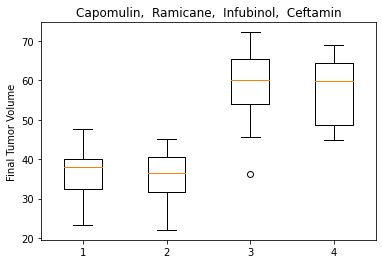

In [225]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# We create a Single Chart with BoxPlots of the Tumor Volume:

# show axes, labels
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin,  Ramicane,  Infubinol,  Ceftamin')
ax1.set_ylabel('Final Tumor Volume')
data_bp = [capomulin_t,ramicane_t, infubinol_t, ceftamin_t]
#boxplot
boxpt = ax1.boxplot(data_bp)
#results
plt.show()

## Line and Scatter Plots

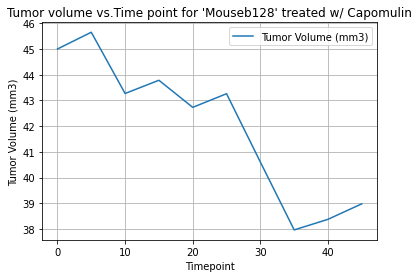

In [226]:
# Generate a line plot of tumor volume vs. time point for a single mouse  treated with Capomulin
capomulin_single = capomulin_df.loc[capomulin_df ["Mouse ID"]== "b128",:]
capomulin_single.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, title="Tumor volume vs.Time point for 'Mouseb128' treated w/ Capomulin")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

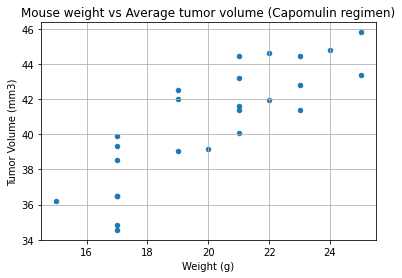

In [227]:
# Generate a scatter plot of average tumor volume vs. mouse weight # for all mice in the Capomulin regimen
capomulin_df_ave = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_df_ave.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, title="Mouse weight vs Average tumor volume (Capomulin regimen)")
plt.show()

## Correlation and Regression

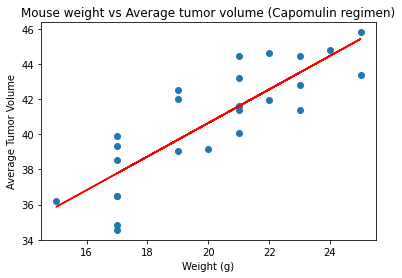

In [228]:
## Add the linear regression equation and line to plot
# I imported linegress to run the code

x_weight = capomulin_df_ave['Weight (g)']
y_volume = capomulin_df_ave['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_volume)
#regression value equation
regress_val = x_weight * slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_weight,y_volume)
plt.plot(x_weight,regress_val,"r-")
#labels
plt.title('Mouse weight vs Average tumor volume (Capomulin regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
#show results
plt.show()

# Observations and Insights

In [229]:
#Interestingly, when we look at the pie plot, it shows that there is mostly an equal male and female mice distribution
#Also, looking at the Average tumor volume vs Mouse weight in the capomulin regimine scatterplot, we can see that as the weight of the mouse increases, the tumor also increases.
#Furthermore, the scatterplot also show the correlation between increasing mouse weight and tumor volume for mice in capomulin 
#And the scatterplot has an ascending regression line thereby delineating a positive correlation between the variables.